# **<h1><center>DIP ASSIGNMENT 2</center></h1>**

# **(1) Image Display** 

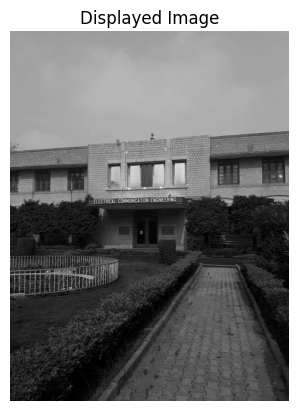

(796, 600)

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread

# Load the image
im = imread('images/ECE.png', as_gray=True)

# Display the image
plt.imshow(im, cmap='gray')
plt.title('Displayed Image')
plt.axis('off')

# Save the image as "output 1.Actual_Image.png"
save_path = "output/1.Displayed_Image.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()

# Output the shape of the image
im.shape


### **Method 1: Explicitly Setting Value Range [vmin, vmax]**

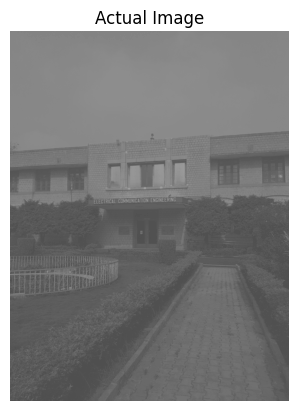

uint8


(796, 600)

In [2]:
# Check the data type of the image
image_dtype = im.dtype

# Display the image again with adjusted vmin and vmax
if image_dtype == 'float64':
    plt.imshow(im, cmap='gray', vmin=0, vmax=1)
else:  # Assuming uint8 if not float
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('Actual Image')
plt.axis('off')

# Save the image as "output 1.Actual_Image.png"
save_path = "output/1.Actual_Image.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()

print(image_dtype)
im.shape



### **Method 2: Convert Grayscale to RGB Image**

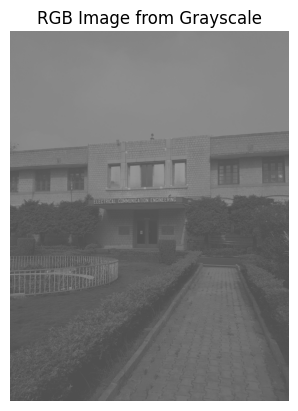

(796, 600, 3)

In [3]:
import numpy as np

# Replicating grayscale image into 3-channel RGB format
rgb_image = np.stack([im, im, im], axis=-1) # Stacking 2D image array along the last (3rd or Z) dimension (axis = 2)

# Display the RGB image
plt.imshow(rgb_image)
plt.title('RGB Image from Grayscale')
plt.axis('off')

# Save the image as "output 1.Actual_Image.png"
save_path = "output/1.Actual_Image.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()

rgb_image.shape


# **(2) Contrast Stretching**

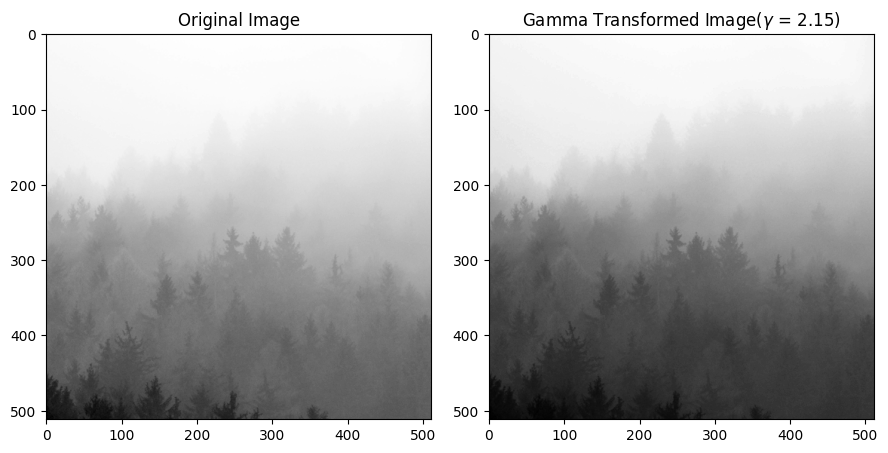

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gamma_transform(image, gamma):
    """
    Apply gamma transform to an image.
    
    Parameters:
    - image: np.array of shape (height, width), grayscale image.
    - gamma: float, gamma value for the transformation.
    
    Returns:
    - np.array of shape (height, width), gamma transformed image.
    """
    
    # Normalize the image to [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    
    # Apply gamma transformation
    gamma_corrected = np.power(normalized_image, gamma)
    
    # Convert the image back to [0, 255] : de-Normalize
    gamma_corrected = np.clip(gamma_corrected * 255.0, 0, 255).astype(np.uint8)
    
    return gamma_corrected

# Load the image for testing the function
hazy_image = cv2.imread("images/hazy.png", cv2.IMREAD_GRAYSCALE)
#print(hazy_image.shape)   # 512x512 (grayscale Image)
gamma_test = 2.15
gamma_test_image = gamma_transform(hazy_image, gamma_test)

# Displaying the original and transformed images for visual verification
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.imshow(hazy_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gamma_test_image, cmap='gray')
plt.title(f'Gamma Transformed Image($\gamma$ = {gamma_test:.2f})')
plt.tight_layout()
#plt.axis('off')
plt.show()


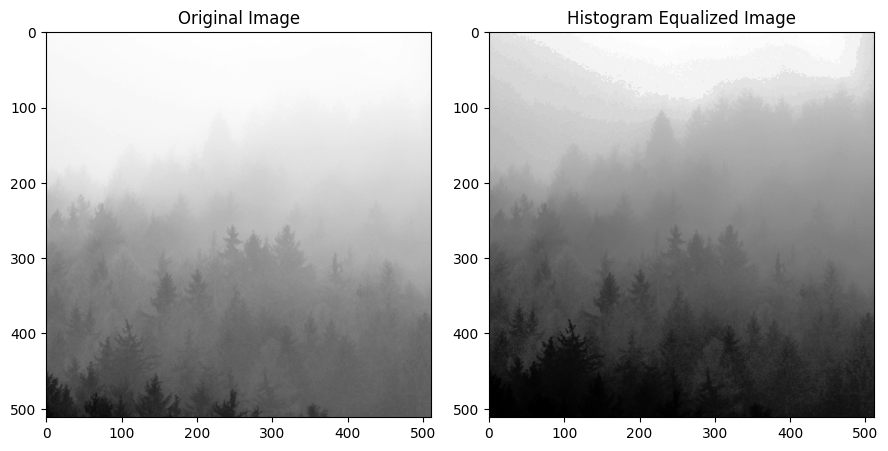

In [5]:
def histogram_equalization(image):
    """
    Apply histogram equalization to an image.
    
    Parameters:
    - image: np.array of shape (height, width), grayscale image.
    
    Returns:
    - np.array of shape (height, width), histogram equalized image.
    """
    
    # Calculate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate cumulative distribution
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # cdf.max()  = number of pixels
    
    # Mask all zeros (avoid division by zero and zero times anything)
    cdf_masked = np.ma.masked_equal(cdf, 0)
    
    # Equalize (ignoring the zero frequency pixels to avoid division by zero error)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    
    # Fill in masked places with 0 (place back the zeros in equalized value array)
    cdf_filled = np.ma.filled(cdf_masked, 0).astype('uint8')  # array: contains new Transformed equalized pixel value for each original image pixel 
    
    # Mapping to equalized image  (Transformation for each pixel)
    equalized_image = cdf_filled[image]  # for all original image pixels
    
    return equalized_image

# Apply histogram equalization on the hazy image
hist_eq_image = histogram_equalization(hazy_image)

# Displaying the original and histogram-equalized images for visual verification
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.imshow(hazy_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(hist_eq_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.tight_layout()
plt.show()


In [6]:
def calculate_mse(image1, image2):
    """
    Calculate the Mean Squared Error (MSE) between two images.
    
    Parameters:
    - image1: np.array of shape (height, width), grayscale image.
    - image2: np.array of shape (height, width), grayscale image.
    
    Returns:
    - float, the MSE between the two images.
    """
    return np.mean((image1 - image2) ** 2)

# Find the optimal gamma value
gamma_values = np.linspace(0.1, 5, 100) # step_size = (5 - 0.1) / 99 ,  Sampling gamma values in the range (0, 5]
mse_values = []

#print(gamma_values)

for gamma in gamma_values:
    gamma_transformed_image = gamma_transform(hazy_image, gamma)
    mse = calculate_mse(hist_eq_image, gamma_transformed_image)
    mse_values.append(mse)

# Get the gamma value with minimum MSE
optimal_gamma = gamma_values[np.argmin(mse_values)]
optimal_gamma_transformed_image = gamma_transform(hazy_image, optimal_gamma)

print(f'optimal_gamma = {optimal_gamma}')


optimal_gamma = 2.673737373737374


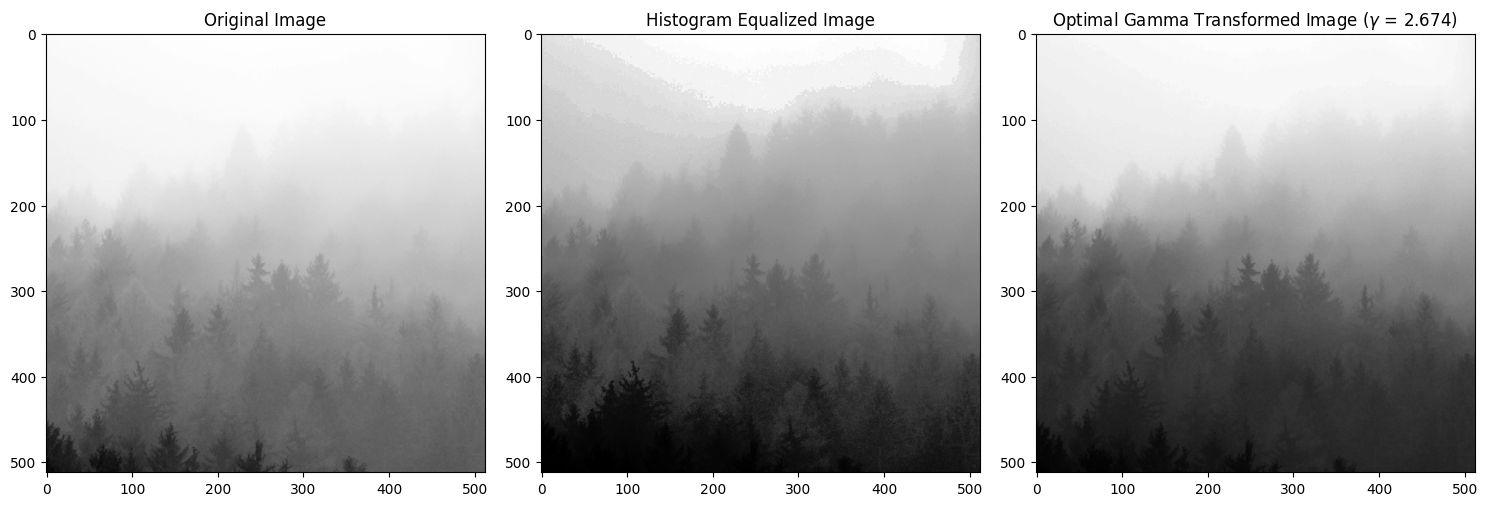

In [7]:
# Displaying the original, histogram-equalized, and optimal gamma-transformed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(hazy_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(hist_eq_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.subplot(1, 3, 3)
plt.imshow(optimal_gamma_transformed_image, cmap='gray')
plt.title(f'Optimal Gamma Transformed Image ($\gamma$ = {optimal_gamma:.3f})')
plt.tight_layout()

# Save the image a
save_path = "output/2.Output_Transformed_Images.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


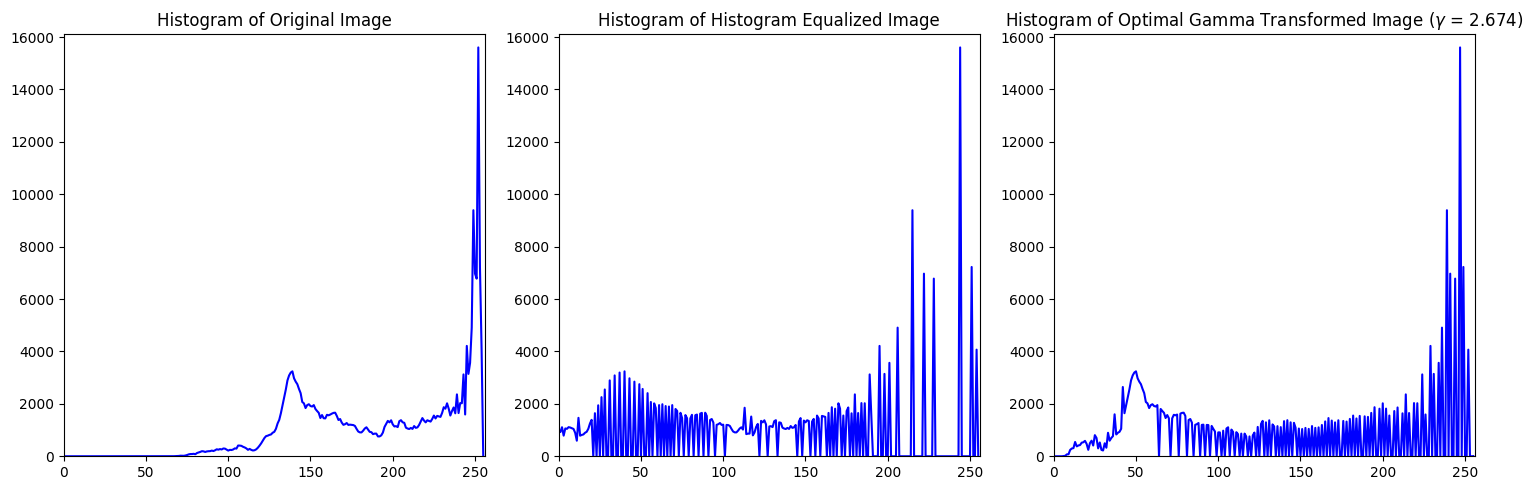

In [8]:
def plot_histogram(image, title):
    """Helper function to plot histogram for an image."""
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    plt.plot(hist, color='blue')
    plt.title(title)
    plt.xlim([0, 256])    # X axis limit
    plt.ylim([0, max(hist) + 500])    # Y axis limit

# Plotting histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_histogram(hazy_image, 'Histogram of Original Image')

plt.subplot(1, 3, 2)
plot_histogram(hist_eq_image, 'Histogram of Histogram Equalized Image')

plt.subplot(1, 3, 3)
plot_histogram(optimal_gamma_transformed_image, f'Histogram of Optimal Gamma Transformed Image ($\gamma$ = {optimal_gamma:.3f})')

plt.tight_layout()

# Save the image 
save_path = "output/2.Output_Transformed_histograms.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


# **(3) Image Rotation**

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def rotate_image(img, degrees, method):
    """
    Rotates the given image by the specified degrees using the provided interpolation method.
    
    Parameters:
    - img: 2D numpy array representing the grayscale image.
    - degrees: Float representing the degrees to rotate the image. Positive values indicate clockwise rotation, and negative values indicate counter-clockwise rotation.
    - method: String indicating the interpolation method to use. Can be 'nearest' for Nearest Neighbor or 'bilinear' for Bilinear interpolation.
    
    Returns:
    - 2D numpy array representing the rotated image.
    """
    
    # Convert the angle from degrees to radians
    theta = np.deg2rad(degrees)
    
    # Calculate the cosine and sine values for the rotation angle
    cos = np.cos(theta)
    sin = np.sin(theta)

    # Get the height and width of the image
    h, w = img.shape
    
    # Calculate the center of the image
    c_x, c_y = w // 2, h // 2  

    # Calculate the new coordinates of the corners after rotation
    corners = [(0, 0), (0, h), (w, 0), (w, h)]
    new_corners = [(c_x + cos*(x-c_x) - sin*(y-c_y), c_y + sin*(x-c_x) + cos*(y-c_y)) for x, y in corners]
    
    # Get the dimensions of the new bounding box for the rotated image
    new_w = int(max([x for x, y in new_corners]) - min([x for x, y in new_corners]))
    new_h = int(max([y for x, y in new_corners]) - min([y for x, y in new_corners]))

    # Initialize the rotated image with a white background
    rotated = 255 * np.ones((new_h, new_w))  

    # For each pixel in the new image, calculate its corresponding position in the original image
    for y in range(new_h):
        for x in range(new_w):   # backward mapping (can be fractional)
            old_x = (cos * (x - (new_w // 2)) + sin * (y - (new_h // 2))) + c_x
            old_y = (-sin * (x - (new_w // 2)) + cos * (y - (new_h // 2))) + c_y

            # Use Nearest Neighbor interpolation
            if method == 'nearest':
                old_x_round = round(old_x)
                old_y_round = round(old_y)
                
                # Check if the coordinates lie within the boundaries of the original image (since in Rotated image , we have extra non-original pixels)
                if 0 <= old_x_round < w and 0 <= old_y_round < h:  # (non original white pixels in Rotated image are filtered here after backward map, they may lie out of w and h)
                    rotated[y, x] = img[old_y_round, old_x_round]  
            # Since, rotation can lead to some pixel positions in the rotated image corresponding to positions outside the original image's boundaries.
            
            # Use Bilinear interpolation
            elif method == 'bilinear':
                x1, y1 = int(old_x), int(old_y)
                x2, y2 = x1 + 1, y1 + 1

                # Check if the coordinates lie within the boundaries of the original image  (non original white pixels in Rotated image are filtered here )
                if 0 <= x1 < w and 0 <= y1 < h:
                    a = old_x - x1
                    b = old_y - y1
                    x2 = min(x2, w-1)  # edge cases (lies within original image cordinates)
                    y2 = min(y2, h-1)  # edge cases 

                    # Calculate the bilinear interpolated value (avg of 4 pixels values)
                    rotated[y, x] = (1-a) * (1-b) * img[y1, x1] + a * (1-b) * img[y1, x2] + (1-a) * b * img[y2, x1] + a * b * img[y2, x2]
            else:
                # Raise an error for invalid interpolation method
                raise ValueError("Invalid interpolation method")

    return rotated


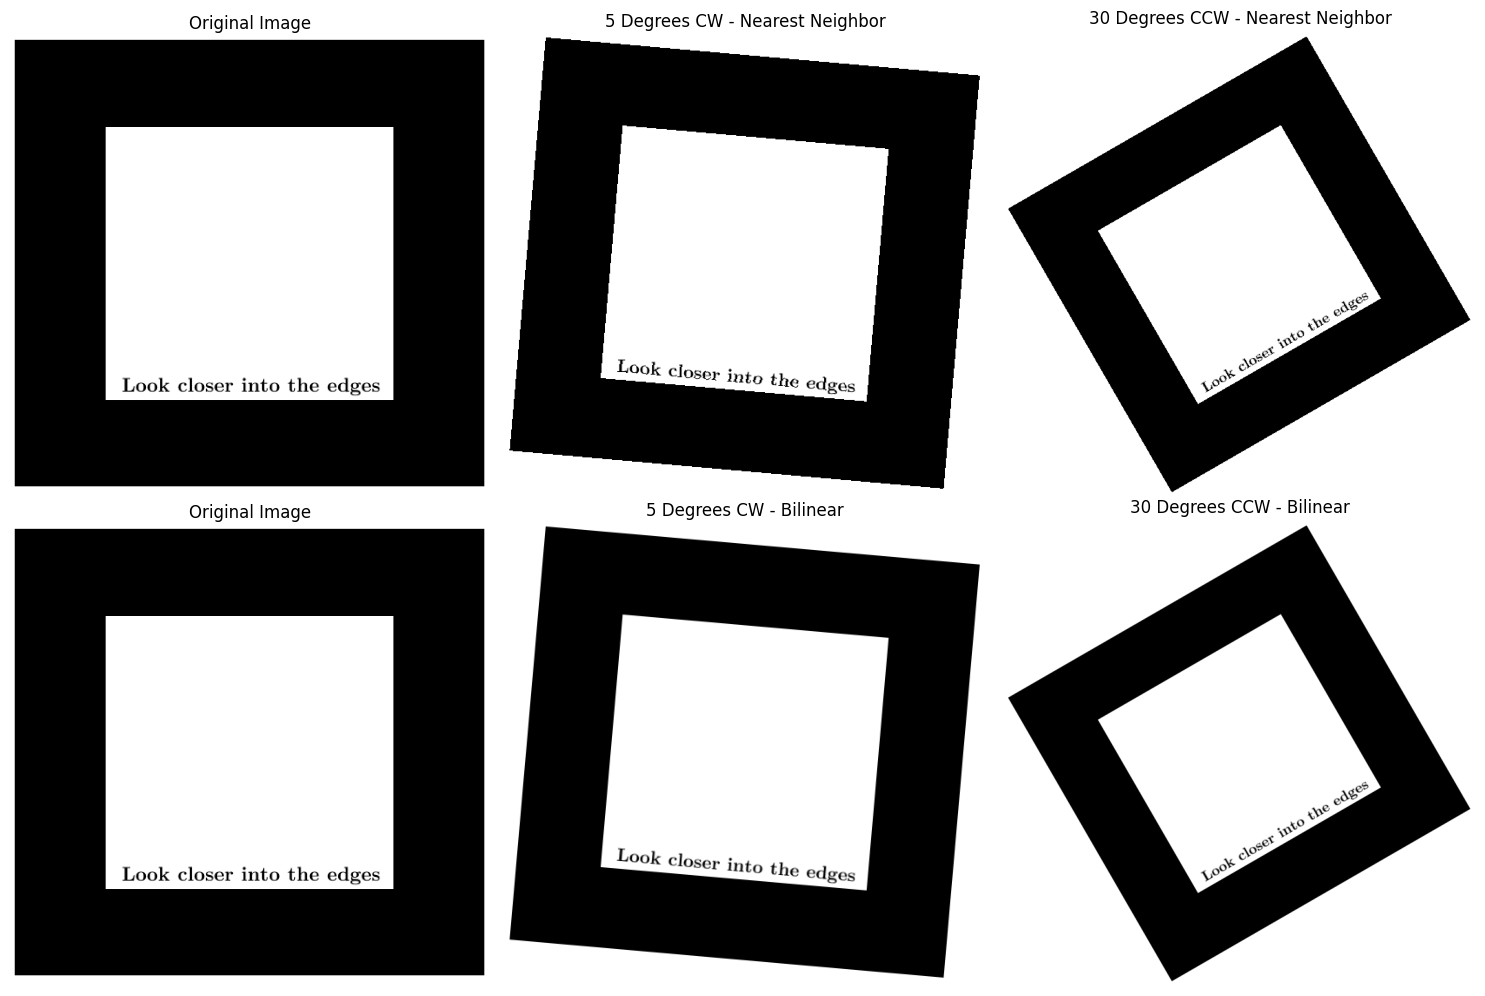

In [10]:
# Load the image
img = cv2.imread('images/box.png', cv2.IMREAD_GRAYSCALE)

# Rotate images
img_rotated_5_nn = rotate_image(img, 5, 'nearest')       ## CW - positive
img_rotated_5_bi = rotate_image(img, 5, 'bilinear')
img_rotated_minus_30_nn = rotate_image(img, -30, 'nearest')   # CCW - negative
img_rotated_minus_30_bi = rotate_image(img, -30, 'bilinear')

# Display the images in Jupyter notebook using matplotlib
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(img_rotated_5_nn, cmap='gray')
axs[0, 1].set_title('5 Degrees CW - Nearest Neighbor')
axs[0, 2].imshow(img_rotated_minus_30_nn, cmap='gray')
axs[0, 2].set_title('30 Degrees CCW - Nearest Neighbor')
axs[1, 0].imshow(img, cmap='gray')
axs[1, 0].set_title('Original Image')
axs[1, 1].imshow(img_rotated_5_bi, cmap='gray')
axs[1, 1].set_title('5 Degrees CW - Bilinear')
axs[1, 2].imshow(img_rotated_minus_30_bi, cmap='gray')
axs[1, 2].set_title('30 Degrees CCW - Bilinear')

# Remove axis for a cleaner look
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()

# Save the image 
save_path = "output/3.Rotated_Images.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


In [11]:
# import cv2

# def zoom_edge(image, factor=2, edge_section=50):
#     """
#     Zoom into the edges of the image.
#     :param image: Input image.
#     :param factor: Zoom factor.
#     :param edge_section: Pixels width/height for the edge section to zoom.
#     :return: Zoomed image.
#     """
#     h, w = image.shape
    
#     # Crop the top-left corner for demonstration
#     cropped = image[0:edge_section, 0:edge_section]
    
#     # Resize to zoom in
#     zoomed = cv2.resize(cropped, (cropped.shape[1] * factor, cropped.shape[0] * factor))
    
#     return zoomed


# # Load the image
# img = cv2.imread('images/box.png', cv2.IMREAD_GRAYSCALE)

# # Rotate images
# img_rotated_5_nn = rotate_image(img, 5, 'nearest')       ## CW - positive
# img_rotated_5_bi = rotate_image(img, 5, 'bilinear')
# img_rotated_minus_30_nn = rotate_image(img, -30, 'nearest')   # CCW - negative
# img_rotated_minus_30_bi = rotate_image(img, -30, 'bilinear')

# # Zoom edges
# img_zoom = zoom_edge(img)
# img_rotated_5_nn_zoom = zoom_edge(img_rotated_5_nn)
# img_rotated_5_bi_zoom = zoom_edge(img_rotated_5_bi)
# img_rotated_minus_30_nn_zoom = zoom_edge(img_rotated_minus_30_nn)
# img_rotated_minus_30_bi_zoom = zoom_edge(img_rotated_minus_30_bi)

# # Display zoomed images using OpenCV
# cv2.imshow('Original Image - Zoomed Edge', img_zoom)
# cv2.imshow('5 Degrees CW - Nearest Neighbor - Zoomed Edge', img_rotated_5_nn_zoom)
# cv2.imshow('5 Degrees CW - Bilinear - Zoomed Edge', img_rotated_5_bi_zoom)
# cv2.imshow('30 Degrees CCW - Nearest Neighbor - Zoomed Edge', img_rotated_minus_30_nn_zoom)
# cv2.imshow('30 Degrees CCW - Bilinear - Zoomed Edge', img_rotated_minus_30_bi_zoom)

# cv2.waitKey(0)  # Wait for a key press to close the images
# cv2.destroyAllWindows()  # Close all OpenCV windows

# # If you want to save the zoomed images as well:
# cv2.imwrite("output/original_zoomed_edge.png", img_zoom)
# cv2.imwrite("output/3.5_degrees_CW_Nearest_Neighbor_zoomed_edge.png", img_rotated_5_nn_zoom)
# cv2.imwrite("output/3.5_degrees_CW_Bilinear_zoomed_edge.png", img_rotated_5_bi_zoom)
# cv2.imwrite("output/3.30_degrees_CCW_Nearest_Neighbor_zoomed_edge.png", img_rotated_minus_30_nn_zoom)
# cv2.imwrite("output/3.30_degrees_CCW_Bilinear_zoomed_edge.png", img_rotated_minus_30_bi_zoom)


# **(4) Spatial Filtering**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

def average_filter(img, kernel_size):
    """
    Applies average filter on the image.

    Parameters:
    - img: 2D numpy array representing the image.
    - kernel_size: Size of the averaging kernel.

    Returns:
    - Blurred image.
    """
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    blurred_img = convolve2d(img, kernel, mode='same', boundary='symm')
    return blurred_img

def high_boost_filter(img, k, kernel_size):
    """
    Applies high-boost filter on the image.

    Parameters:
    - img: 2D numpy array representing the image.
    - k: Scaling constant for the high pass component.
    - kernel_size: Size of the averaging kernel.

    Returns:
    - Sharpened image.
    """
    # Blur the image
    blurred_img = average_filter(img, kernel_size)
    
    # Calculate the mask
    mask = img - blurred_img
    
    # High-boost the image
    sharpened_img = img + k * mask
    
    # Ensure that the pixel values are within [0, 255]
    sharpened_img = np.clip(sharpened_img, 0, 255)
    
    return sharpened_img, mask




(373, 560)


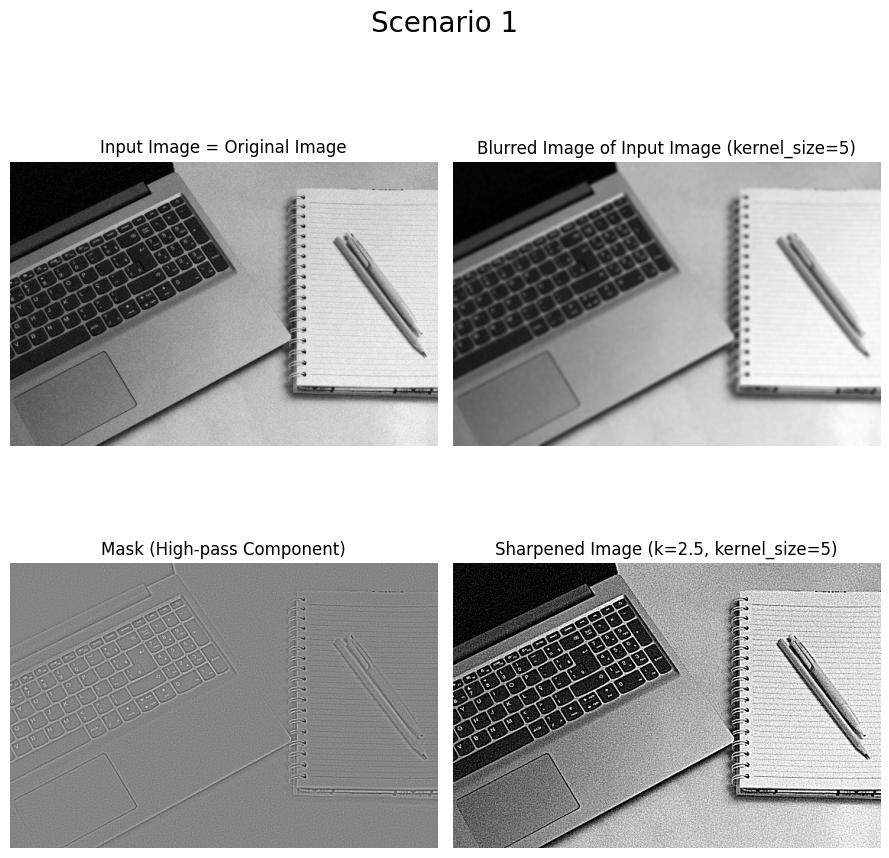

In [13]:
# Load the image
img = Image.open('images/study.png').convert('L')  # Convert image to grayscale
img = np.array(img)
print(img.shape)  # grayscale image ((373, 560))


# Scenario 1

# Blur the original image with kernel size of 5
blurred_img_1 = average_filter(img, kernel_size=5)

# Apply high-boost filter on the original image with kernel size of 5 and k = 2.5
sharpened_img_1, mask_1 = high_boost_filter(img, k=2.5, kernel_size=5)

# Display the images
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Input Image = Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(blurred_img_1, cmap='gray')
axs[0, 1].set_title('Blurred Image of Input Image (kernel_size=5)')
axs[0, 1].axis('off')

axs[1, 0].imshow(mask_1, cmap='gray')
axs[1, 0].set_title('Mask (High-pass Component)')
axs[1, 0].axis('off')

axs[1, 1].imshow(sharpened_img_1, cmap='gray')
axs[1, 1].set_title('Sharpened Image (k=2.5, kernel_size=5)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.suptitle("Scenario 1", fontsize=20, y=1.05)

# Save the image 
save_path = "output/4.Sharpened_Image_1.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()

(373, 560)


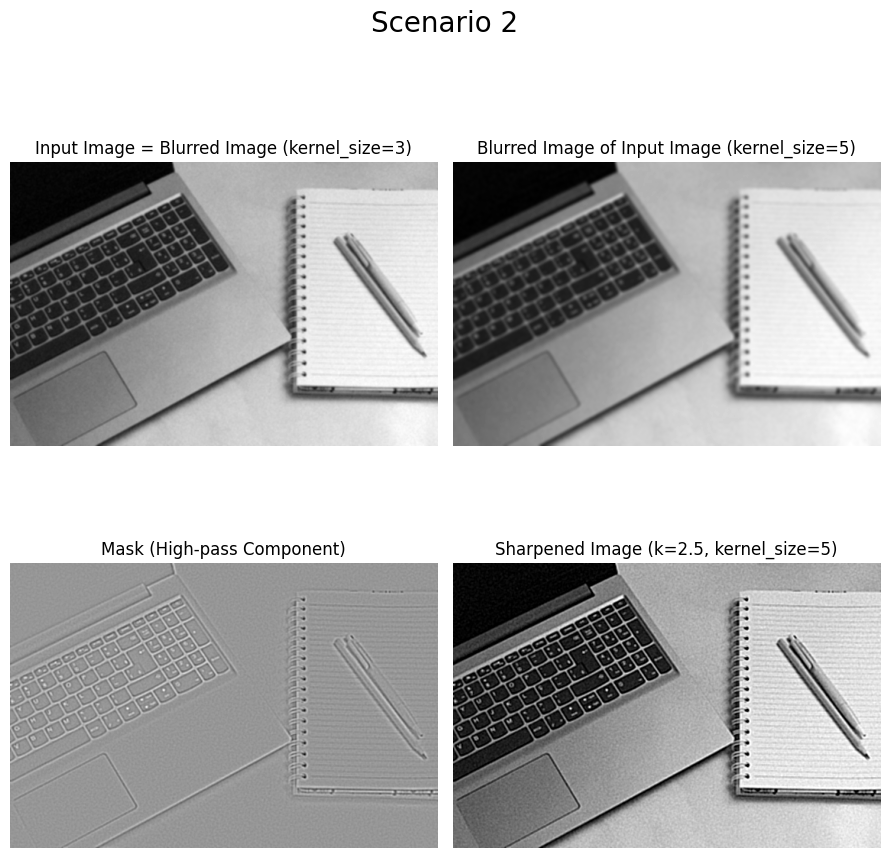

In [14]:
print(img.shape)  # grayscale image ((373, 560))


# Scenario 2

# Blur the original image with kernel size of 3
blurred_input_image = average_filter(img, kernel_size=3)

# Blur the blurred image (done with kernal size 3) with kernel size of 5
blurred_img_2 = average_filter(blurred_input_image, kernel_size=5)



# Apply the same high-boost filter on the blurred image with kernel size of 5 and k = 2.5
sharpened_img_2, mask_2 = high_boost_filter(blurred_input_image, k=2.5, kernel_size=5)

# Display the images
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

axs[0, 0].imshow(blurred_input_image, cmap='gray')
axs[0, 0].set_title('Input Image = Blurred Image (kernel_size=3)')
axs[0, 0].axis('off')

axs[0, 1].imshow(blurred_img_2, cmap='gray')
axs[0, 1].set_title('Blurred Image of Input Image (kernel_size=5)')
axs[0, 1].axis('off')

axs[1, 0].imshow(mask_2, cmap='gray')
axs[1, 0].set_title('Mask (High-pass Component)')
axs[1, 0].axis('off')

axs[1, 1].imshow(sharpened_img_2, cmap='gray')
axs[1, 1].set_title('Sharpened Image (k=2.5, kernel_size=5)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.suptitle("Scenario 2", fontsize=20, y=1.05)

# Save the image 
save_path = "output/4.Sharpened_Image_2.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')


plt.show()